<a href="https://colab.research.google.com/github/CamdenBert/CSCI290/blob/main/notebooks/gp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
import math
import matplotlib.pyplot as plt

In [14]:
df=pd.read_csv('https://raw.githubusercontent.com/jhbellingrath/CS-290-Classwork/refs/heads/main/data/survey%20lung%20cancer.csv')

In [15]:
target="LUNG_CANCER"

In [16]:
attributes=df.columns[df.columns!=target]
attributes=attributes.drop("AGE")
attributes

Index(['GENDER', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE',
       'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN'],
      dtype='object')

In [17]:
# entropy function for qualitative
def entropy(attribute):
  entropy = 0
  total = len( df )
  vals = df[attribute].unique()
  for val in vals:
    counts = len(df[ df[attribute] == val ])
    weight = counts / total
    props = df[ df[attribute] == val ][target].value_counts( normalize=True )
  for p in props.array:
    entropy =  entropy - weight*(p*math.log2(p))
  return entropy

In [18]:
# Gini function
def gini(attribute):
  impurities=[]
  vals=df[attribute].unique()
  for val in vals:
    impurity=0
    impurity_left=1
    weight=len(df[df[attribute]>=val])/len(df)
    counts=(df[df[attribute]>=val][target].value_counts())
    for count in counts.array:
      impurity_left-=((count/(len(df)*weight))**2)
    impurity+=impurity_left*weight
    impurity_right=1
    weight=len(df[df[attribute]<val])/len(df)
    counts=(df[df[attribute]<val][target].value_counts())
    for count in counts.array:
      impurity_right-=((count/(len(df)*weight))**2)
    impurity+=impurity_right*weight
    impurities.append([impurity,val])
  impurities.sort()
  return impurities[0][0]

In [19]:
gini("ALLERGY ")

0.19687181202855122

In [20]:
#  entropy for a quantitative variable
def entropy_quantitative(attribute):
  entropies=[]
  total = len(df)
  vals = df[attribute].unique()
  for val in vals:
    entropy_value = 0
    # Left split
    left = df[df[attribute] <= val][[attribute, target]]
    props = left[target].value_counts(normalize=True)
    weight = len(left) / total
    for prop in props.array:
      entropy_value -= weight * prop * math.log2(prop)

    # Right split
    right = df[df[attribute] > val][[attribute, target]]
    props = right[target].value_counts(normalize=True)
    weight = len(right) / total
    for prop in props.array:
      entropy_value -= weight * prop * math.log2(prop)

    entropies.append([entropy_value,val])
  entropies.sort()
  return entropies[0]
  #returns a list of [entropy value,split value]

In [21]:
def Attribute_selection_method(data,task,target,impurity_measure):
  attributes=data.columns[data.columns!=target]
  if task=="classification":
    if impurity_measure=="entropy":
      entropies=[]
      for attribute in attributes:
        if len(data[attribute].unique())<5:
          entropies.append([entropy(attribute),attribute])
        else:
          entropies.append(entropy_quantitative(attribute))
      entropies.sort()
      return "The best attribute is "+entropies[0][1]
    if impurity_measure=="gini":
      ginis=[]
      for attribute in attributes:
        ginis.append([gini(attribute),attribute])
      ginis.sort()
      return ginis
      return "The best attribute is "+ginis[0][1]

In [22]:
Attribute_selection_method(df,"classification","LUNG_CANCER","gini")

[[0.19687181202855122, 'ALLERGY '],
 [0.2022049431995164, 'ALCOHOL CONSUMING'],
 [0.2056880629067421, 'SWALLOWING DIFFICULTY'],
 [0.20685907250322627, 'WHEEZING'],
 [0.20693922338441517, 'COUGHING'],
 [0.21256713795768778, 'CHEST PAIN'],
 [0.2129048527419966, 'PEER_PRESSURE'],
 [0.21331434278547207, 'YELLOW_FINGERS'],
 [0.21556004554899105, 'FATIGUE '],
 [0.21560963308536127, 'AGE'],
 [0.21593339325879257, 'ANXIETY'],
 [0.21785516131604077, 'CHRONIC DISEASE'],
 [0.21956978884086303, 'GENDER'],
 [0.21975373431684128, 'SHORTNESS OF BREATH'],
 [0.219820869859928, 'SMOKING']]

In [23]:
# LabelEncoder
le = LabelEncoder()

In [24]:
# target variable
df["LUNG_CANCER"] = le.fit_transform(df["LUNG_CANCER"])

In [25]:
# Compare
X = df.drop(columns=["LUNG_CANCER"])
y = df["LUNG_CANCER"]

In [26]:
# Iterate over all columns in X
for col in X.columns:
    if X[col].dtype == 'object':  # Check if the column is object
        X[col] = le.fit_transform(X[col])  # Fit and transform


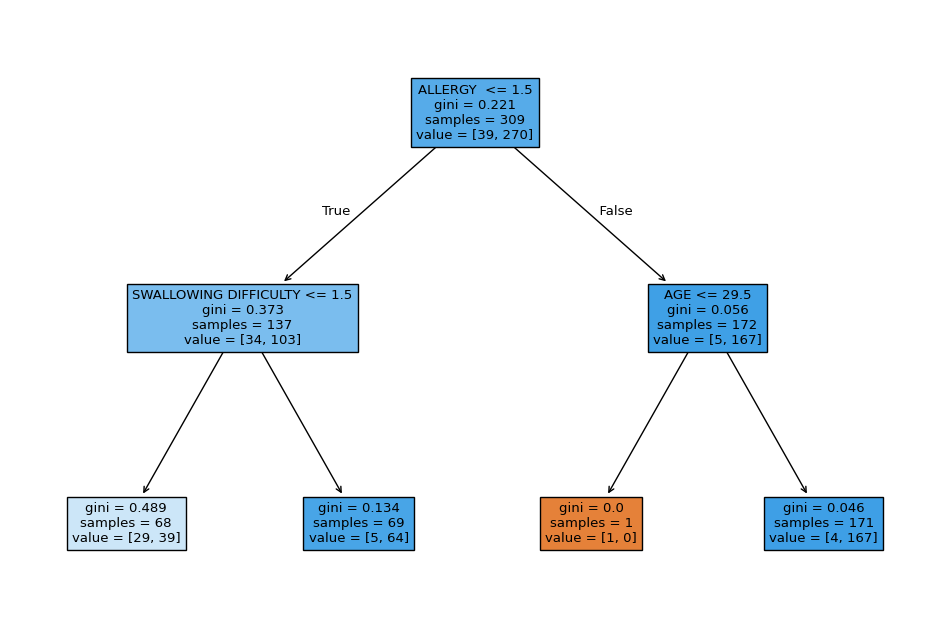

In [27]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=2)
clf.fit(X, y)
plt.figure(figsize=(12, 8))
tree.plot_tree(clf, filled=True, feature_names=X.columns)
plt.show()

In [28]:
# Get the first split attribute
first_split_attribute = X.columns[clf.tree_.feature[0]]
print("First attribute chosen by DecisionTreeClassifier:", first_split_attribute)

First attribute chosen by DecisionTreeClassifier: ALLERGY 


In [29]:
df2=pd.read_csv('https://raw.githubusercontent.com/jhbellingrath/CS-290-Classwork/refs/heads/main/data/Housing_Prices.csv')

In [30]:
df2.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built
0,376000.0,3,2.00,1340,1384,3.0,0,0,3,1340,0,2008
1,800000.0,4,3.25,3540,159430,2.0,0,0,3,3540,0,2007
2,2238888.0,5,6.50,7270,130017,2.0,0,0,3,6420,850,2010
3,324000.0,3,2.25,998,904,2.0,0,0,3,798,200,2007
4,549900.0,5,2.75,3060,7015,1.0,0,0,5,1600,1460,1979


In [31]:
target_2 = "price"
#target

In [32]:
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)
#mean squared error function
#difference between the predicted and actual values
#calculates the mean squared error
#np mean is the average of all the squares

In [33]:
def best_split(attribute, target):
    unique_values = np.unique(attribute) #get all unique vals from attribute
    best_mse = float('inf') #positive infinity to store lowest mse so far
    best_value = None #stores the lowest mse overall

In [34]:
def best_split(attribute, target):
    unique_values = np.unique(attribute) #get all unique vals from attribute
    best_mse = float('inf') #positive infinity to store lowest mse so far
    best_value = None #stores the lowest mse overall

    for value in unique_values:#goes through eah unique value
        left_mask = attribute <= value #boolean mask is true when attribute is <= current value
        right_mask = attribute > value #opposite of the other one duh

        if np.any(left_mask) and np.any(right_mask): #makes sure there is one point left and right
            y_left = target[left_mask] #gets the target vals that match the data in the left
            y_right = target[right_mask] #the opposite
            mse = (mean_squared_error(y_left, y_left.mean()) * len(y_left) + mean_squared_error(y_right, y_right.mean()) * len(y_right)) / len(target)
            #stupid math you can probably do ina better way than my small brain
            #cal the weighted avg for the split, did it for left and right and then combione them based on num of datapoints in each subset
            #crazy that the comment is shorter than that dumb math
            #pls simplify this
            if mse < best_mse: #i feel like i dont need to explain this to you fat brain
                best_mse = mse
                best_value = value

    return best_value, best_mse #same with this

In [35]:
def Attribute_selection_method(task, dataset, target_variable): #find the best attribute to split on



    df = pd.DataFrame(dataset) # convert dataset into pandas


    X = df.drop(columns=[target_variable]) #new dataset that doesnt have price
    y = df[target_variable].values # target varibale into numpy array

    best_overall_mse = float('inf') #same as when i did this earleir
    best_attribute = None #also same

    for column in X.columns: #goes through each attribute in x
        value, mse = best_split(X[column].values, y) #calls best split to find best split on current column
        if mse < best_overall_mse:#durp durp durp durp durp duhhhhhhhhh
            best_overall_mse = mse
            best_attribute = column


    tree = DecisionTreeRegressor(max_depth=1) #
    tree.fit(X, y)

    first_split_attribute = X.columns[tree.tree_.feature[0]]

    return best_attribute, first_split_attribute

In [36]:
url = "https://raw.githubusercontent.com/jhbellingrath/CS-290-Classwork/refs/heads/main/data/Housing_Prices.csv"
data = pd.read_csv(url)
#getting data cuhhhhh

In [37]:
best_attribute, first_split = Attribute_selection_method("regression", data, "price")
print("Best attribute for split:", best_attribute)
print("First split by DecisionTreeRegressor:", first_split)
#printing all my stuff yurrrrr
#still not sure if this is how to use sklearn or not but its probably

Best attribute for split: sqft_living
First split by DecisionTreeRegressor: sqft_living


Mean Squared Errors for each attribute:
bedrooms: 330602565129.1989
bathrooms: 316803431878.9963
sqft_living: 303734274793.2872
sqft_lot: 334975813738.1112
floors: 332975319089.0512
waterfront: 334726552602.2292
view: 325312282828.2652
condition: 340047490755.1081
sqft_above: 313912263978.4517
sqft_basement: 326831587994.9846
yr_built: 338511938153.6638

Best attribute for split: sqft_living
First split by DecisionTreeRegressor: sqft_living

Mean Squared Error from sklearn: 303734274793.2872


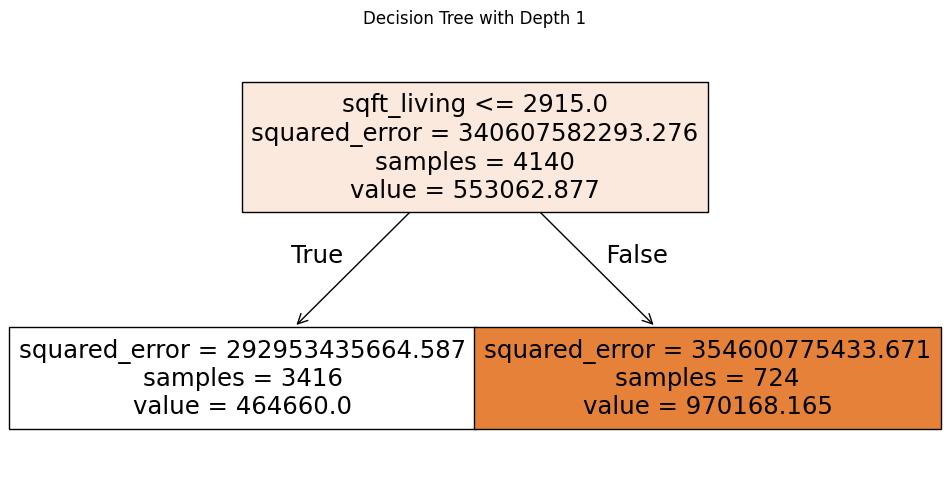

In [38]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error as sklearn_mse
import matplotlib.pyplot as plt

target_variable = "price"

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def best_split(attribute, target):
    unique_values = np.unique(attribute)
    best_mse = float('inf')
    best_value = None

    for value in unique_values:
        left_mask = attribute <= value
        right_mask = attribute > value

        if np.any(left_mask) and np.any(right_mask):
            y_left = target[left_mask]
            y_right = target[right_mask]
            mse = (mean_squared_error(y_left, y_left.mean()) * len(y_left) +
                    mean_squared_error(y_right, y_right.mean()) * len(y_right)) / len(target)
            if mse < best_mse:
                best_mse = mse
                best_value = value

    return best_value, best_mse

def Attribute_selection_method(task, dataset, target_variable):
    df = pd.DataFrame(dataset)
    X = df.drop(columns=[target_variable])
    y = df[target_variable].values

    best_overall_mse = float('inf')
    best_attribute = None

    mse_results = {}

    for column in X.columns:
        value, mse = best_split(X[column].values, y)
        mse_results[column] = mse  # Store MSE for this attribute

        if mse < best_overall_mse:
            best_overall_mse = mse
            best_attribute = column

    # Fit Decision Tree
    tree = DecisionTreeRegressor(max_depth=1)
    tree.fit(X, y)

    # First split
    first_split_attribute = X.columns[tree.tree_.feature[0]]

    # Predictions and sklearn MSE
    predictions = tree.predict(X)
    sklearn_mse_value = sklearn_mse(y, predictions)

    # Print MSE results
    print("Mean Squared Errors for each attribute:")
    for attribute, mse in mse_results.items():
        print(f"{attribute}: {mse:.4f}")

    print("\nBest attribute for split:", best_attribute)
    print("First split by DecisionTreeRegressor:", first_split)
    print(f"\nMean Squared Error from sklearn: {sklearn_mse_value:.4f}")

    return best_attribute, first_split_attribute, tree, X, y

url = "https://raw.githubusercontent.com/jhbellingrath/CS-290-Classwork/refs/heads/main/data/Housing_Prices.csv"
data = pd.read_csv(url)

best_attribute, first_split, tree, X, y = Attribute_selection_method("regression", data, "price")

plt.figure(figsize=(12, 6))
plot_tree(tree, feature_names=X.columns, filled=True)
plt.title("Decision Tree with Depth 1")
plt.show()


The best attribute is ALLERGY 


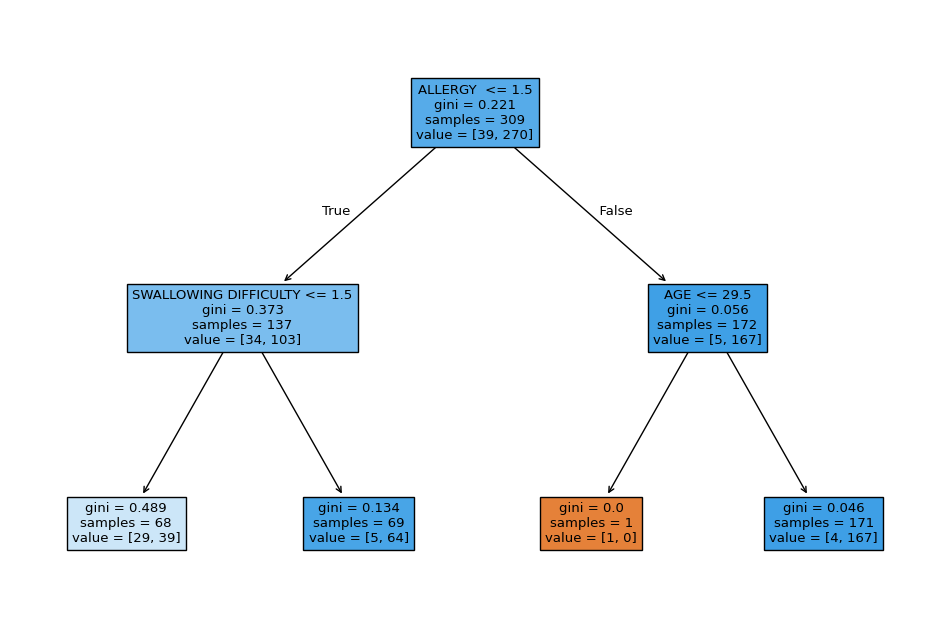

First attribute chosen by DecisionTreeClassifier: ALLERGY 
Best attribute for split: sqft_living
First split by DecisionTreeRegressor: bathrooms


In [42]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
import math
import matplotlib.pyplot as plt

# Load the lung cancer dataset
df = pd.read_csv('https://raw.githubusercontent.com/jhbellingrath/CS-290-Classwork/refs/heads/main/data/survey%20lung%20cancer.csv')
target = "LUNG_CANCER"
attributes = df.columns[df.columns != target].drop("AGE")

# Entropy function for qualitative attributes
def entropy(attribute):
    entropy_val = 0
    total = len(df)
    vals = df[attribute].unique()
    for val in vals:
        counts = len(df[df[attribute] == val])
        weight = counts / total
        props = df[df[attribute] == val][target].value_counts(normalize=True)
        for p in props:
            entropy_val -= weight * (p * math.log2(p))
    return entropy_val

# Gini function for qualitative attributes
def gini(attribute):
    impurities = []
    vals = df[attribute].unique()
    for val in vals:
        impurity = 0
        weight_left = len(df[df[attribute] >= val]) / len(df)
        counts_left = df[df[attribute] >= val][target].value_counts()
        impurity_left = 1 - sum((count / (len(df) * weight_left))**2 for count in counts_left)

        weight_right = len(df[df[attribute] < val]) / len(df)
        counts_right = df[df[attribute] < val][target].value_counts()
        impurity_right = 1 - sum((count / (len(df) * weight_right))**2 for count in counts_right)

        impurity += impurity_left * weight_left + impurity_right * weight_right
        impurities.append([impurity, val])
    impurities.sort()
    return impurities[0][0]

# Entropy for quantitative variables
def entropy_quantitative(attribute):
    entropies = []
    total = len(df)
    vals = df[attribute].unique()
    for val in vals:
        entropy_value = 0
        left = df[df[attribute] <= val][[attribute, target]]
        props = left[target].value_counts(normalize=True)
        weight = len(left) / total
        for prop in props:
            entropy_value -= weight * prop * math.log2(prop)

        right = df[df[attribute] > val][[attribute, target]]
        props = right[target].value_counts(normalize=True)
        weight = len(right) / total
        for prop in props:
            entropy_value -= weight * prop * math.log2(prop)

        entropies.append([entropy_value, val])
    entropies.sort()
    return entropies[0]

# Attribute selection method for classification and regression
def Attribute_selection_method(data, task, target_variable, impurity_measure=None):
    attributes = data.columns[data.columns != target_variable]

    if task == "classification":
        measures = []
        for attribute in attributes:
            if len(data[attribute].unique()) < 5:
                measure = entropy(attribute) if impurity_measure == "entropy" else gini(attribute)
            else:
                measure = entropy_quantitative(attribute) if impurity_measure == "entropy" else gini(attribute)
            measures.append([measure, attribute])
        measures.sort()
        return "The best attribute is " + measures[0][1]

    elif task == "regression":
        best_overall_mse = float('inf')
        best_attribute = None

        for column in attributes:
            value, mse = best_split(data[column].values, data[target_variable].values)
            if mse < best_overall_mse:
                best_overall_mse = mse
                best_attribute = column

        tree = DecisionTreeRegressor(max_depth=1)
        tree.fit(data.drop(columns=[target_variable]), data[target_variable])
        first_split_attribute = data.columns[tree.tree_.feature[0]]
        return best_attribute, first_split_attribute

# Function to find best split for regression
def best_split(attribute, target):
    unique_values = np.unique(attribute)
    best_mse = float('inf')
    best_value = None

    for value in unique_values:
        left_mask = attribute <= value
        right_mask = attribute > value

        if np.any(left_mask) and np.any(right_mask):
            y_left = target[left_mask]
            y_right = target[right_mask]
            mse = (mean_squared_error(y_left, y_left.mean()) * len(y_left) +
                    mean_squared_error(y_right, y_right.mean()) * len(y_right)) / len(target)

            if mse < best_mse:
                best_mse = mse
                best_value = value

    return best_value, best_mse

# Function to calculate mean squared error
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Running the attribute selection for classification
classification_result = Attribute_selection_method(df, "classification", target, impurity_measure="gini")
print(classification_result)

# Label encoding for classification
le = LabelEncoder()
df["LUNG_CANCER"] = le.fit_transform(df["LUNG_CANCER"])

# Prepare features and target for classification
X = df.drop(columns=["LUNG_CANCER"])
y = df["LUNG_CANCER"]

# Encode categorical features
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = le.fit_transform(X[col])

# Train Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='gini', max_depth=2)
clf.fit(X, y)

# Plot decision tree
plt.figure(figsize=(12, 8))
tree.plot_tree(clf, filled=True, feature_names=X.columns)
plt.show()

# First split attribute
first_split_attribute = X.columns[clf.tree_.feature[0]]
print("First attribute chosen by DecisionTreeClassifier:", first_split_attribute)

# Load housing prices dataset
df2 = pd.read_csv('https://raw.githubusercontent.com/jhbellingrath/CS-290-Classwork/refs/heads/main/data/Housing_Prices.csv')
target_2 = "price"

# Running the attribute selection for regression
best_attribute, first_split = Attribute_selection_method(df2, "regression", target_2)
print("Best attribute for split:", best_attribute)
print("First split by DecisionTreeRegressor:", first_split)
